In [37]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

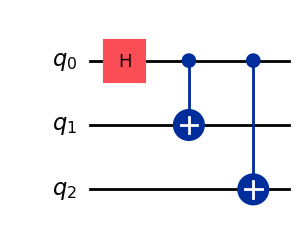

In [38]:
circuit = QuantumCircuit(3)

### YOUR CODE GOES HERE ###
circuit.h(0)
circuit.cx(0, [1, 2])

circuit.draw(output='mpl');

In [39]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
circuit.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(circuit)
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

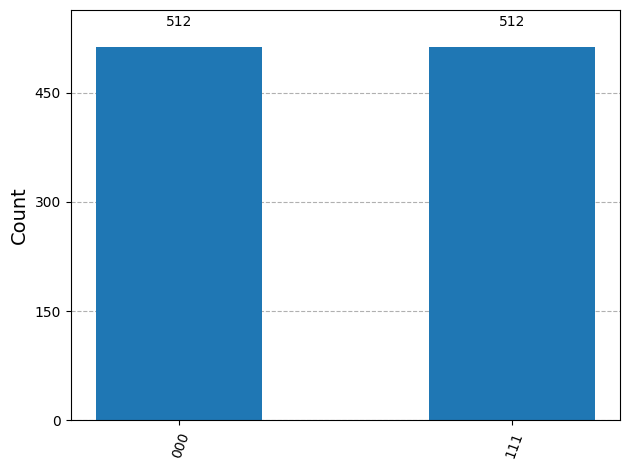

In [40]:
circuit.measure_all()

# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts());

## Generalised GHZ state

Above I created a basic GHZ state with 3 qubits. But this type of state can be extended to n qubits. For this we can simply use a loop to entangle all qubits together (I would not recommend setting n to a large number due to simulation constraints)

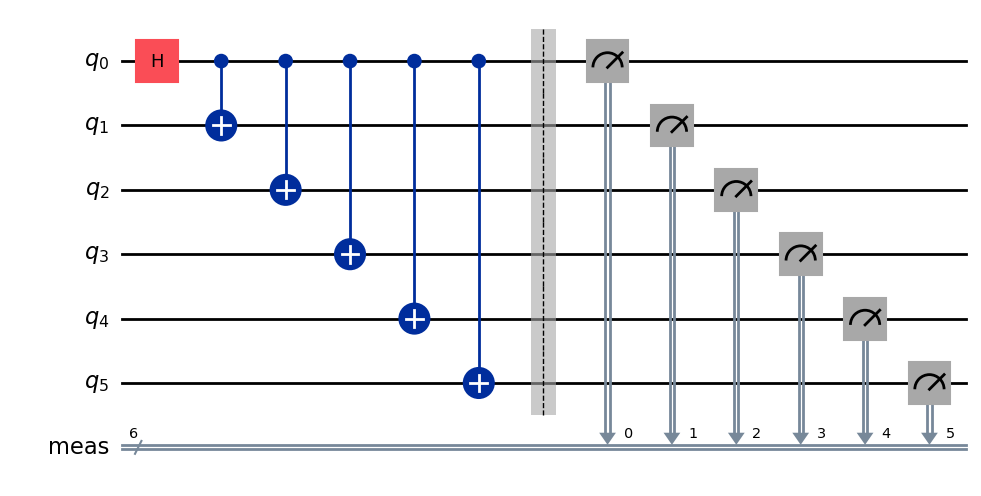

In [41]:
n = 6
qc = QuantumCircuit(n)
qc.h(0)
for i in range(1, n):
  qc.cx(0, i)
qc.measure_all()
qc.draw('mpl');

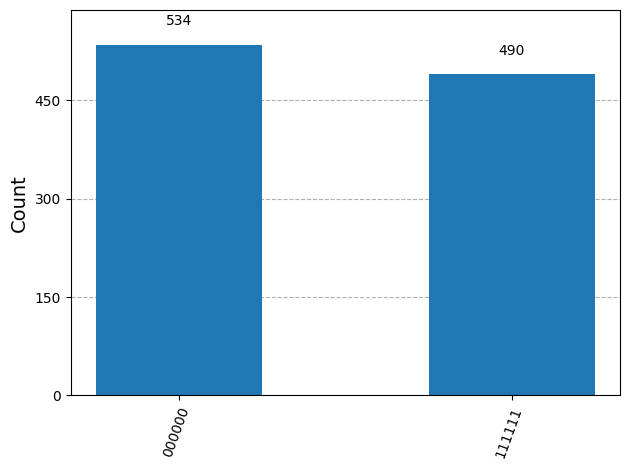

In [42]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_qc = transpile(qc, simulator)
result = simulator.run(compiled_qc).result()
plot_histogram(result.get_counts());

In [43]:
# We can also see this from the statevector representation, that only 2 states are occupied
qc.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(qc)
array_to_latex(statevector, prefix="\\text{statevector = }\n", max_size = 2**n)

<IPython.core.display.Latex object>

## Building the $|W\rangle$ state

For the bonus challenge I created the following circuit to create the W-state: $|W\rangle = \frac{|001\rangle + |010\rangle + |100\rangle}{\sqrt{3}}$.

The circuit works by first rotating around Y by $\cos^{-1}(1/3)$ to prepare the desired ratio of 1/3. Then a CH gate is applied to split the state into three. At this point the W state is almost complete $|001\rangle$ and $|010\rangle$ are two of the final states and the right probability ratios are in place. The Toffoli gate + the two X-gates make sure that the $|011\rangle$ state can be transformed into the required $|100\rangle$ state.

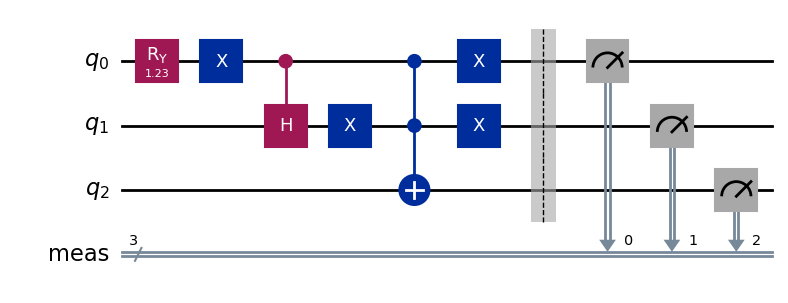

In [116]:
from math import acos
qcw = QuantumCircuit(3)
# Rotate to sqrt(2/3)|000> + sqrt(1/3)|001>. This prepares the proper probability ratio
qcw.ry(acos(1/3), 0)
# Flip to sqrt(1/3)|000> + sqrt(2/3)|001> 
qcw.x(0)
# Conditionally apply H_1. This gives: sqrt(1/3)|000> + sqrt(1/3)|001> + sqrt(1/3)|011>
qcw.ch(0, 1)
# Flip second qubit to get sqrt(1/3)|010> + sqrt(1/3)|011> + sqrt(1/3)|001>
qcw.x(1)
# Conditionally flip qubit 3: sqrt(1/3)|010> + sqrt(1/3)|111> + sqrt(1/3)|001>
qcw.ccx(0, 1, 2)
# Flip first two qubits, this does nothing to the |010> and |001> states since they transform into each other
# but transforms the |111> state into the third required state for the W state: |100>
qcw.x([0, 1])
qcw.measure_all()
qcw.draw('mpl');

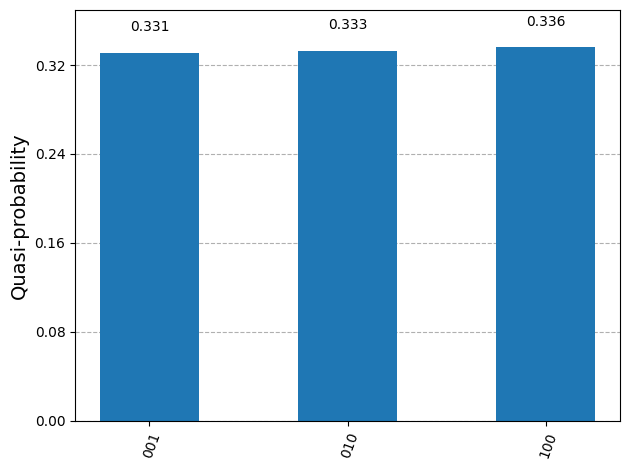

In [117]:
shots=100_000
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_qcw = transpile(qcw, simulator)
result = simulator.run(compiled_qcw, shots=shots).result()
plot_histogram({k:v/shots for k, v in result.get_counts().items()});